**受监督的回归任务**：给定一组包含目标（分数）的数据，希望训练一个可以学习将特征（变量）映射到目标的模型。

**监督问题**：给出了特征和目标。

**回归问题**：目标是一个连续变量，分数范围从0到100
在训练期间，给模型输入特征值和目标值（**训练集**），模型学习特征和分数之间的关系。然后，为了测试模型的学习效果，将在从未见过目标值的**测试集**上进行评估！

该笔记本实现**步骤1-3**（总流程见**README.md**）

## Imports

In [2]:
import pandas as pd
import numpy as np

# 切片复制警告设置不提示
pd.options.mode.chained_assignment = None

# 显示60个列
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
# 魔法函数
%matplotlib inline

# 默认字号
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

import seaborn as sns
sns.set(font_scale = 2)

from sklearn.model_selection import train_test_split

# Data Cleaning and Formatting
## Load in the Data and Examine

In [3]:
# 数据读取
data = pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

# 展示几行数据
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

## Data Types and Missing Values

In [4]:
# 列信息：数据类型，非缺失值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

## Convert Data to Correct Types

In [5]:
# np.nan可解释为数字
data = data.replace({'Not Available': np.nan})

for col in list(data.columns):
    # 选择应为数字的列
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # 转换类型为float
        data[col] = data[col].astype(float)

In [6]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

## Missing Values

In [7]:
# 按列计算缺失值
def missing_values_table(df):
        # 总缺失值
        mis_val = df.isnull().sum()
        
        # 缺失值占比
        mis_val_percent = mis_val / len(df) * 100
        
        # 结果表
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # 重命名列名
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : '缺失值', 1 : '缺失值占比'})
        
        # 按缺失值占比降序排列
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '缺失值占比', ascending=False).round(1)
        
        # 打印信息
        print ("一共" + str(df.shape[1]) + "列，\n"      
            "其中" + str(mis_val_table_ren_columns.shape[0]) +
              "列有缺失值。")
        
        return mis_val_table_ren_columns

In [8]:
missing_values_table(data)

一共60列，
其中46列有缺失值。


,缺失值,缺失值占比
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


In [9]:
# 缺失值占比大于50%，删除该列
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['缺失值占比'] > 50].index)
print('删除%d列。' % len(missing_columns))

一共60列，
其中46列有缺失值。
删除11列。


In [10]:
# 删除列
data = data.drop(columns=list(missing_columns))

# Exploratory Data Analysis
## Single Variable Plots

Text(0.5,1,'Energy Star Score Distribution')

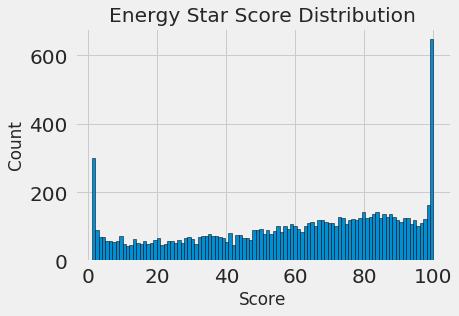

In [11]:
# Energy Star Score分布图
figsize=(8, 8)
data = data.rename(columns = {'ENERGY STAR Score': 'score'})
plt.style.use('fivethirtyeight')
# 正常显示中文
#plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['axes.unicode_minus'] = False
plt.hist(data['score'].dropna(), bins=100, edgecolor = 'k')
plt.xlabel('Score') # x：分数
plt.ylabel('Count') # y：数量
plt.title('Energy Star Score Distribution')

Text(0.5,1,'Site EUI Distribution')

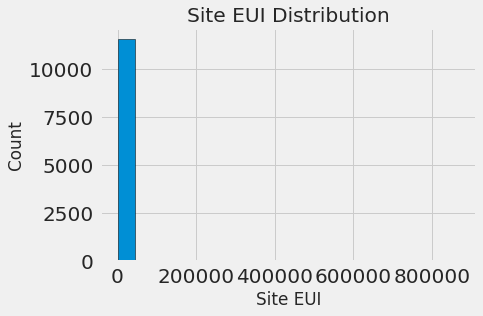

In [12]:
# Site EUI分布图，Energy Use Intensity：能源使用强度，即能源消耗总量除以建筑物的平方英尺
figsize=(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')
# outliers

In [13]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [14]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)
# 其中一栋建筑远高于其他建筑

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [15]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


## Removing Outliers

In [16]:
# 1/4和3/4分位数
first_quartle = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartle = data['Site EUI (kBtu/ft²)'].describe()['75%']
#四分位间距
iqr = third_quartle - first_quartle
#剔除异常值(根据极端异常值定义)
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartle - 3*iqr)) &
           (data['Site EUI (kBtu/ft²)'] < (third_quartle + 3*iqr))]

Text(0.5,1,'Site EUI Distribution')

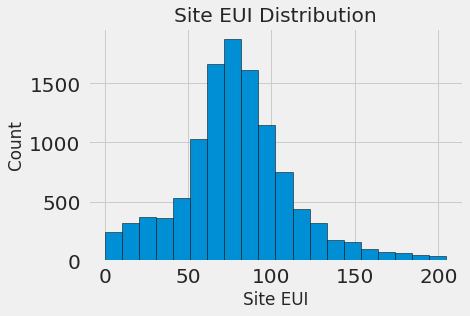

In [17]:
# Site EUI分布图
figsize=(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

## Looking for Relationships

In [18]:
# 超过100个观测值的建筑物列表
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

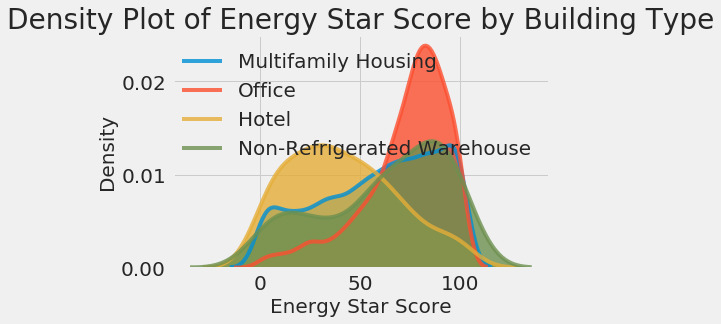

In [19]:
# 建筑物类别分数分布图
figsize=(12, 10)
# 绘制每个建筑物
for b_type in types:
    # 选择建筑类型
    subset = data[data['Largest Property Use Type'] == b_type]
    # 能源之星分数密度图
    sns.kdeplot(subset['score'].dropna(), label = b_type, shade=True, alpha=0.8)

plt.xlabel('Energy Star Score', size=20)
plt.ylabel('Density', size=20)
plt.title('Density Plot of Energy Star Score by Building Type', size = 28);
# 建筑类型对分数有影响

In [20]:
# 行政区划自治市镇对分数的影响
# 超过100个观测值的行政区列表
boroughs= data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

Text(0.5,1,'Density Plot of Energy Star Score by Borough')

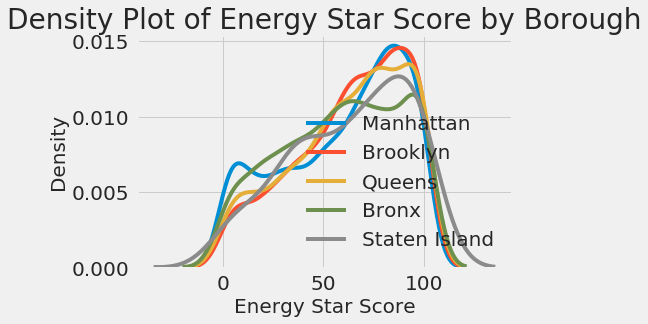

In [21]:
# 行政区分数分布图
figsize=(12, 10)
# 绘制每一个行政区
for borough in boroughs:
    # 选择行政区类型
    subset = data[data['Borough'] == borough]
    # 能源之星分数密度图
    sns.kdeplot(subset['score'].dropna(), label = borough)

plt.xlabel('Energy Star Score', size=20)
plt.ylabel('Density', size=20)
plt.title('Density Plot of Energy Star Score by Borough', size=28)
# 建筑物的行政区对分数的影响没有建筑物类别显著,但是各区有细微差异，也将其纳入我们的模型中

## Correlations between Features and Target

In [22]:
# Pearson相关系数，衡量两个变量之间的线性关系的强度和方向：值-1表示两个变量完全负相关，+1值表示两个变量完全正相关。
correlations_data = data.corr()['score'].sort_values()
# 负相关
print(correlations_data.head(15), '\n')
# EUI：Energy Use Intensity——建筑物使用的能源量除以建筑物的平方英尺
# 随着EUI的增加，能源之星评分趋于下降。
# 正相关
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

In [23]:
# 考虑可能的非线性关系，我们采用数值变量的[对数]和[平方根]变换，对两个选定的分量变量(建筑类型和行政区)进行one-hot编码，
"""
离散特征的编码：
1.取值没有大小意义：one-hot编码
2.取值有大小意义：数值映射
"""
# 计算所有要素与得分之间的相关性，并显示前15个最正相关的和前15个最负相关的。
# 选择数字的列
numeric_subset = data.select_dtypes('number')
# 增加数字列的平方根和对数列
for col in numeric_subset.columns:
    # 跳过分数列
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# 选择范围的列
categorical_subset = data[['Borough', 'Largest Property Use Type']]
# one-hot编码
categorical_subset = pd.get_dummies(categorical_subset)

# 使用concat谅解两个dataframes，进行列绑定(axis=1)
features = pd.concat([numeric_subset, categorical_subset], axis=1)
# 删除没有能源分数的建筑物
features = features.dropna(subset = ['score'])
# 寻找与分数的相关性
correlations = features.corr()['score'].dropna().sort_values()
# 负相关
print(correlations.head(15), '\n')
# 正相关
print(correlations.tail(15))
# EUI还是最强的关系，对数和平方根没有导致任何更强的关系。

/home/difcreate/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/home/difcreate/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()
/home/difcreate/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log


Site EUI (kBtu/ft²)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft²)                         -0.713993
sqrt_Site EUI (kBtu/ft²)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                       -0.645542
Source EUI (kBtu/ft²)                                          -0.641037
log_Source EUI (kBtu/ft²)                                      -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.620329
log_Site EUI (kBtu/ft²)                                        -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.424246
sqrt_Weather Normalized Site Electricity Intensity 

## Two-Variable Plots

Text(0.5,1,'Energy Star Score vs Site EUI')

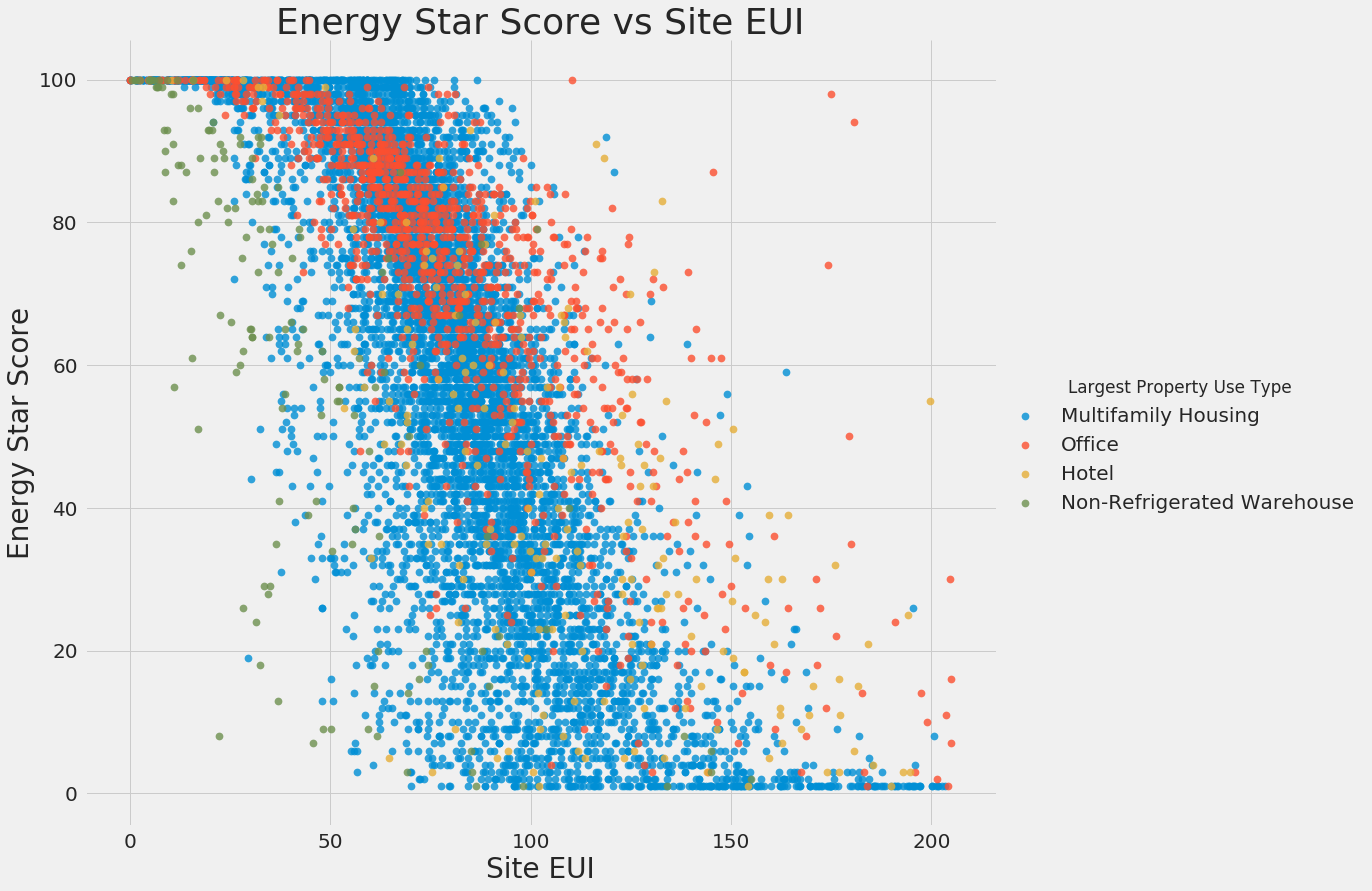

In [24]:
# 散点图：可视化两个变量之间的关系，颜色和大小可标记其他变量。
# 不同建筑物类型的Score和Site EUI的关系。
figsize = (12, 10)
# 提取建筑物类型
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']
# 限制为超过100个观测值的建筑物类型(从源代码获取)
features = features[features['Largest Property Use Type'].isin(types)]
# 绘制Score和Site EUI的散点图
sns.lmplot('Site EUI (kBtu/ft²)', 'score',
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha':0.8, 's':60}, fit_reg = False,
          size = 12, aspect = 1.2)

plt.xlabel('Site EUI', size=28)
plt.ylabel('Energy Star Score', size=28)
plt.title('Energy Star Score vs Site EUI', size=36)
# siteEUI与score之间存在明显的负相关关系，不是完全线性（相关性系数为-0.7），此特征对预测score非常重要

## Pairs Plot

/home/difcreate/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/difcreate/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/difcreate/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/difcreate/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/difcreate/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/difcreate/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


Text(0.5,1.02,'Pairs Plot of Energy Data')

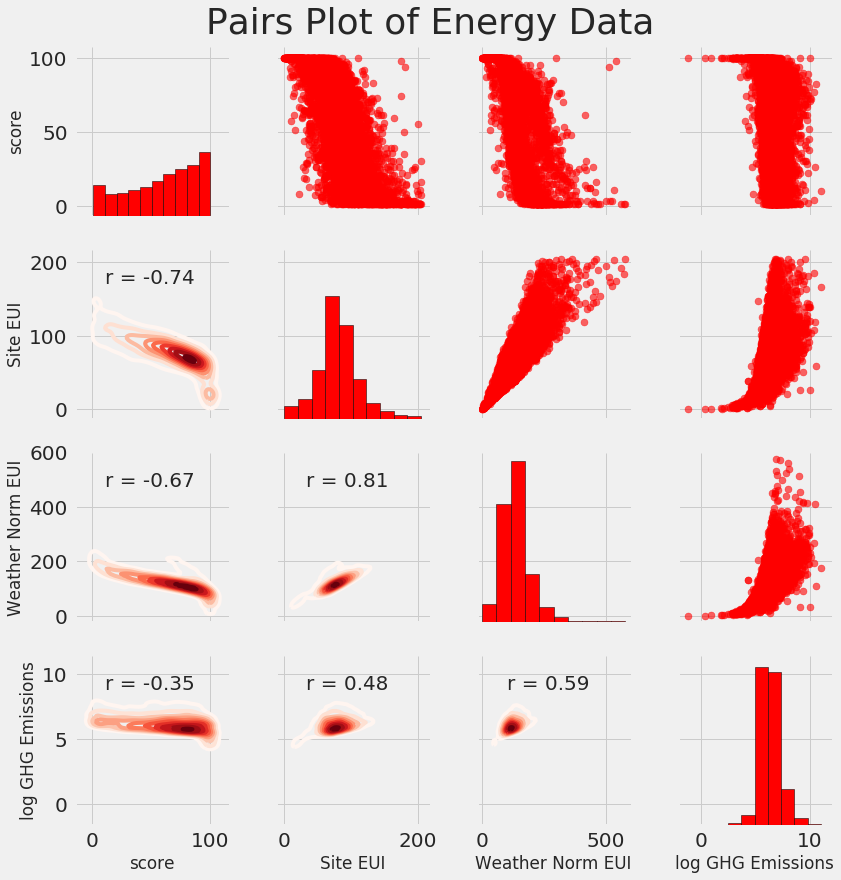

In [25]:
# 使用seaborn的PairGrid函数,可以在几个不同的变量之间建立一对图。
# 上三角形为散点图，对角线显示直方图，下三角形显示两个变量之间的相关系数和两个变量的2-D核密度估计。
# 提取列
plot_data = features[['score', 'Site EUI (kBtu/ft²)',
                      'Weather Normalized Source EUI (kBtu/ft²)',
                      'log_Total GHG Emissions (Metric Tons CO2e)']]
# 讲inf（无穷大）替换为nan（无效数字）
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# 列重命名
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)':'Site EUI',
                                       'Weather Normalized Source EUI (kBtu/ft²)':'Weather Norm EUI',
                                       'log_Total GHG Emissions (Metric Tons CO2e)':'log GHG Emissions'})

# 过滤缺失值
plot_data = plot_data.dropna()
# 计算两列的相关性系数(correlation coefficient)
def corr_func(x, y, **kwargs): # 成对键值对
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca() # 子图
    ax.annotate("r = {:.2f}".format(r),
               xy=(.2, .8), xycoords=ax.transAxes, 
                # 每个axes有属于自己的图像坐标。它以ax1绘图区域总长作为1，称为Axes坐标。也就是ax1.transAx
               size=20)
# 创建PairGrid对象
grid = sns.PairGrid(data=plot_data, size=3)
# 右上：散点图
grid.map_upper(plt.scatter, color='red',alpha=0.6)
# 对角：直方图
grid.map_diag(plt.hist, color='red', edgecolor='black')
# 左下：相关性和密度图
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap=plt.cm.Reds)
# 标题
plt.suptitle('Pairs Plot of Energy Data', size=36, y=1.02)

# Feature Engineering and Selection
### EDA结论
* 分数分布因**建筑类型**而异，并且在较小程度上因**行政区**而异。虽然我们将关注**数字特征**，但我们还应该在模型中包含这两类特征。
* 对特征进行对数变换不会导致特征与分数之间的线性相关性显着增加。

### Feature Engineering
获取原始数据并提取或创建新特征的过程，这些特征允许机器学习模型学习这些特征与目标之间的映射。意味着对变量进行转换，例如我们使用log和square root进行转换，或者使用单热编码分类变量，以便可以在模型中使用它们。通常，**特征工程是添加从原始数据派生的其他特征**。
* 仅选择数值变量和两类变量（自治市镇和财产使用类型）
* 添加数值变量的日志转换
* One-hot编码分类变量

### Feature Selection
选择数据中最相关特征的过程。“最相关”可能取决于许多因素，但它可能与目标的最高相关性或具有最大差异的特征一样简单。在特征选择中，我们删除了无助于我们的模型学习特征与目标之间关系的特征。这可以帮助模型更好地概括新数据并产生更可解释的模型。一般来说，我认为**特征选择是减去特征，只留下最重要的特征**。
* 移除共线特征


In [26]:
# 原始数据copy
features = data.copy()
# 选择数值列
numeric_subset = data.select_dtypes('number')
# 创建数值列的列日志
for col in numeric_subset.columns:
    # 跳过score
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
# 选择类别列
categorical_subset = data[['Borough', 'Largest Property Use Type']]
# one-hot编码
categorical_subset = pd.get_dummies(categorical_subset)
# concat添加两个数据帧，axis=1列绑定
features = pd.concat([numeric_subset, categorical_subset], axis=1)
features.shape
# 有11319个观测（建筑物），具有109个不同的特征（一列是score）。

/home/difcreate/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/difcreate/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


(11319, 110)

## Remove Collinear Features
高共线特征之间具有显著的相关系数。 
例如，在我们的数据集中，Site EUI和Weather Norm EUI高度相关，因为它们只是略微不同的计算能源使用强度的方法。

Text(0.5,1,'Weather Norm EUI vs Site EUI, R = 0.9968')

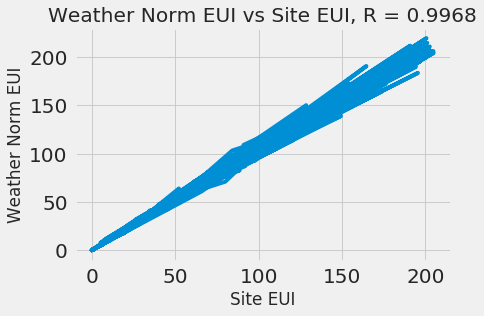

In [27]:
plt_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()
plt.plot(plt_data['Site EUI (kBtu/ft²)'], plt_data['Weather Normalized Site EUI (kBtu/ft²)'])
plt.xlabel('Site EUI')
plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = {:.4f}' 
          .format(np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]))

In [28]:
# 阈值0.6，删除共线特征
def remove_collinear_features(x, threshold):
    '''
    Objective:
        删除数据中共线特征的相关系数大于阈值的特征。 
        删除共线特征可以提高模型泛化能力和提高模型的可解释性。
        
    Inputs: 
        阈值：删除任何相关性大于此值的特征
    
    Output: 
        仅包含非高共线特征的数据
    '''
    
    # 不移除能源之星分数的共线特征
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # 计算相关性矩阵
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # 在相关性矩阵上迭代，比较相关性
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # 超过阈值的相关性
            if val >= threshold:
                # 输出特征和相关性
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # 删除每对相关性特征中的一个
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # 添加分数列
    x['score'] = y
               
    return x

In [29]:
# 删除指定相关性阈值以上的特征
features = remove_collinear_features(features, 0.6);

In [30]:
# 删除全部na的列
features  = features.dropna(axis=1, how = 'all')
features.shape
# 其他特征选择：
# 主成分分析（PCA）:将特征转换为保持最大方差的减少维度数量。
# 独立成分分析（ICA）:找到一组特征中的独立源。
# 虽然这些方法在减少特征数量方面是有效的，但它们创造了没有物理意义的新特征，因此几乎不可能解释模型。

(11319, 65)

## Split Into Training and Testing Sets
* 删除所有没有能源之星得分的建筑物。
* 70％训练集，30％测试集。

In [32]:
# 提取没有分数的建筑和有分数的建筑
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]
print(no_score.shape)
print(score.shape)

(1858, 65)
(9461, 65)


In [49]:
# 区分特征和目标
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])
# 用nan代替inf和-inf
features = features.replace({np.inf:np.nan, -np.inf:np.nan})
# 分割训练集和测试集
X, X_test, y, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)
print(X.shape, y.shape)
print(X_test.shape, y_test.shape)

(6622, 64) (6622, 1)
(2839, 64) (2839, 1)


## Establish a Baseline
### Metric: Mean Absolute Error
I like Andrew Ng's advice to use a **single real-value performance metric**.

In [50]:
# mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [52]:
baseline_guess = np.median(y)
print('基线猜测是{:0.2f}分'.format(baseline_guess))
print('测试集基线性能：MAE=%0.4f' %mae(y_test, baseline_guess))

基线猜测是66.00分
测试集基线性能：MAE=24.5164


## Conclusions
* 数据清理和格式化
* 探索性数据分析
* 特征工程和特征选择

In [54]:
# 保存no_score, training data和testing data
no_score.to_csv('data/no_score.csv', index=False)
X.to_csv('data/training_features.csv', index=False)
X_test.to_csv('data/testing_features.csv', index=False)
y.to_csv('data/training_labels.csv', index=False)
y_test.to_csv('data/testing_labels.csv', index=False)